<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_4540/216893009.py:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_4540/216893009.py:86: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_4540/216893009.py:86: SyntaxWarning: "is" with 

0.0006113537117903912
0.0
2.1834061135371e-05
0.02189956331877725
0.000488342458976066
0.0
2.1021633650864713e-05
0.019968120445483087
0.0008153287329761452
0.0
4.0819518949836754e-05
0.02913552961399391


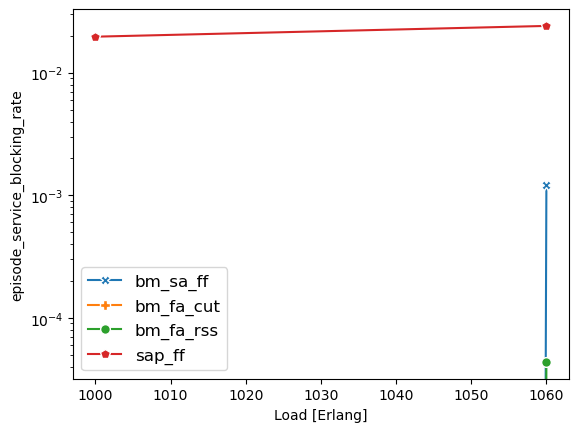

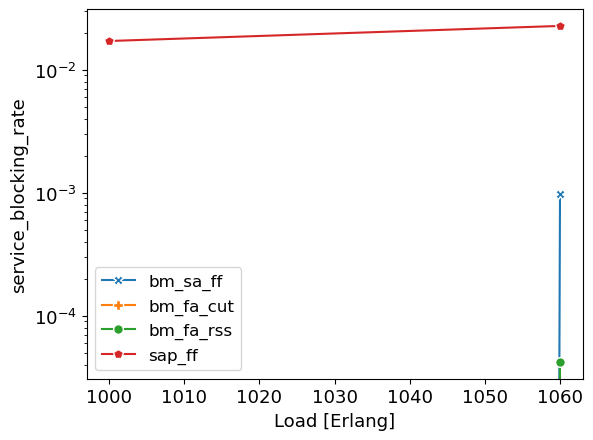

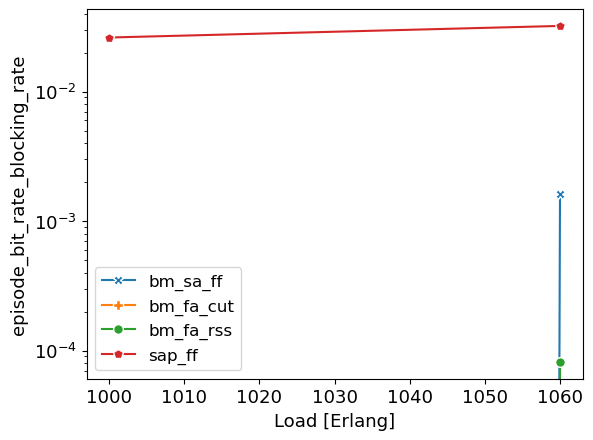

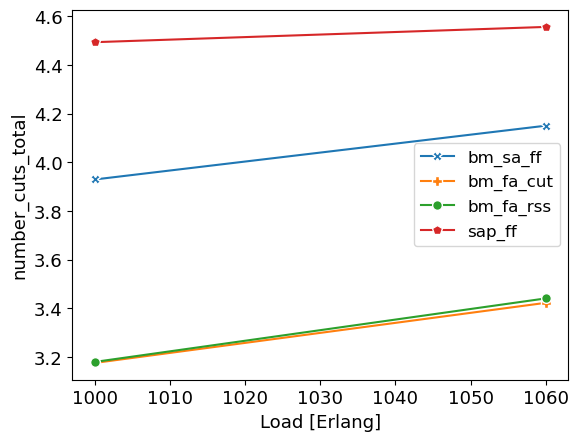

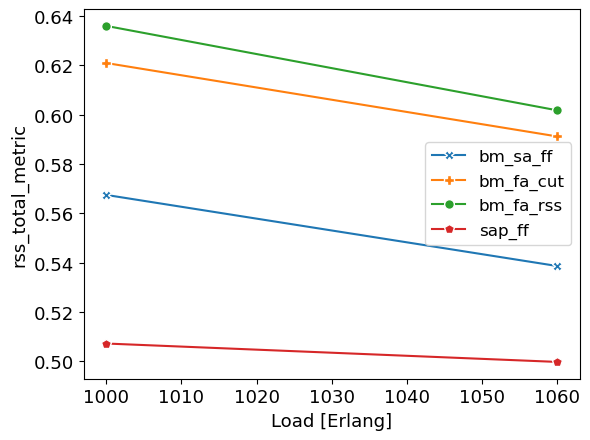

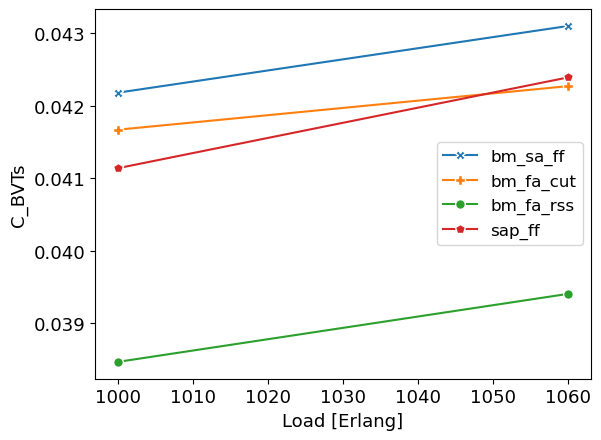

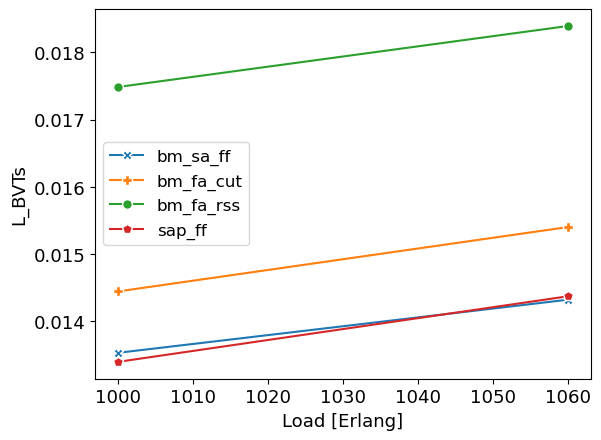

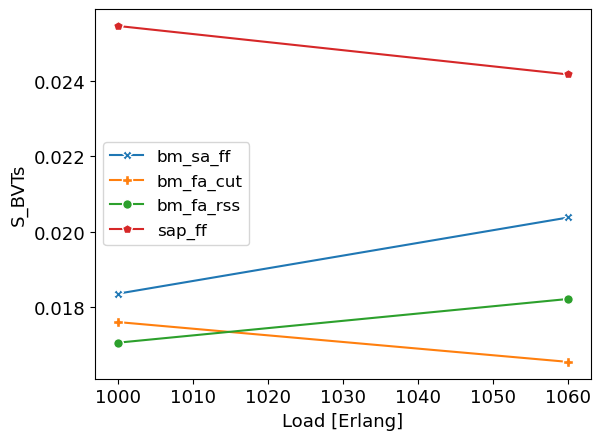

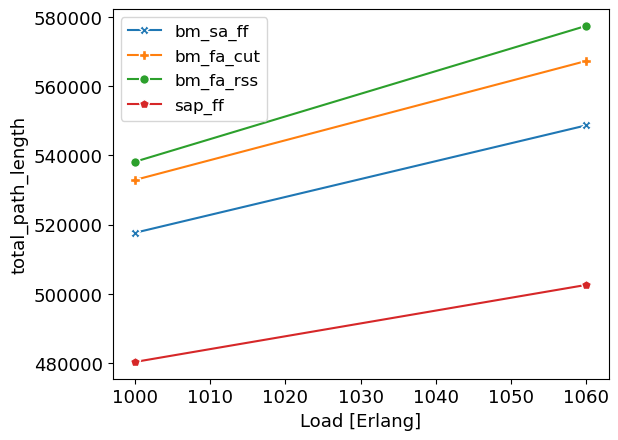

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1000
max_load = 1062
step_length = 60
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)
episode_length = 230

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'C_BVTs',
    'L_BVTs',
    'S_BVTs',
    'total_path_length'
]

sap_ff_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    sap_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length']:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        sap_ff_loads[info].append(np.mean(sap_ff[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length']:
    plt.figure()
    if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        print(f"{np.mean(bm_sa_ff_loads[info])}")
        print(np.mean(bm_fa_cut_loads[info]))
        print(np.mean(bm_fa_rss_loads[info]))
        print(np.mean(sap_ff_loads[info]))
        ax_bm_sa_ff = plt.semilogy(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='X', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_cut = plt.semilogy(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss = plt.semilogy(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='o',
                                           markersize=markersize, markeredgecolor='white')
        ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
    else:
        ax_bm_sa_ff = plt.plot(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='X', markersize=markersize,
                         markeredgecolor='white')
        ax_bm_fa_cut = plt.plot(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_rss = plt.plot(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='o',
                                       markersize=markersize, markeredgecolor='white')
        ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                              markeredgecolor='white')
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Load [Erlang]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)

    plt.legend(loc='upper right')
    plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')





<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_9877/2700128484.py:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_9877/2700128484.py:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_9877/2700128484.py:117: SyntaxWarning

0.02364401913875595
0.019328229665071743
0.0175827751196172
0.04543540669856455
0.01270239234449759
0.005905595710746877
0.010338755980861227
0.04196644810679894
0.021760012694837284
0.01767274130363116
0.01640987713267671
0.04313749812833538
0.011372781694798228
0.0049880197099201285
0.009129602198569174
0.0403019908995131
0.03211576419949425
0.02650926911346866
0.02412666169749946
0.05948778509399531
0.016985824262480395
0.008021743339771702
0.014004573667205126
0.05539145974636735


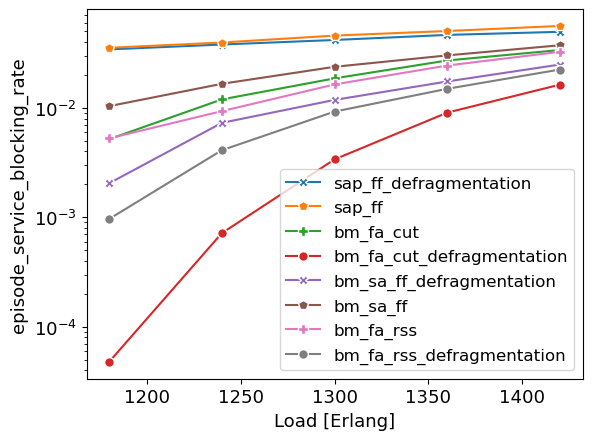

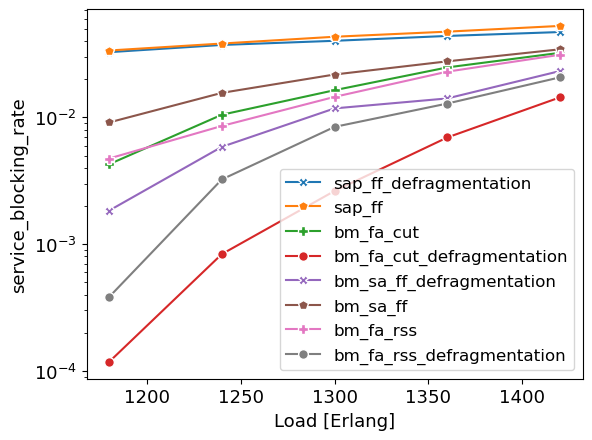

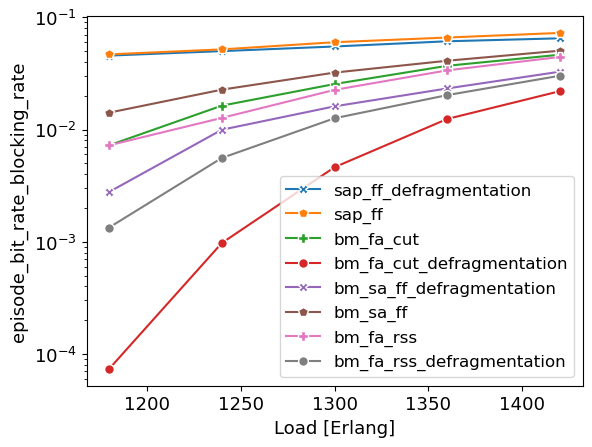

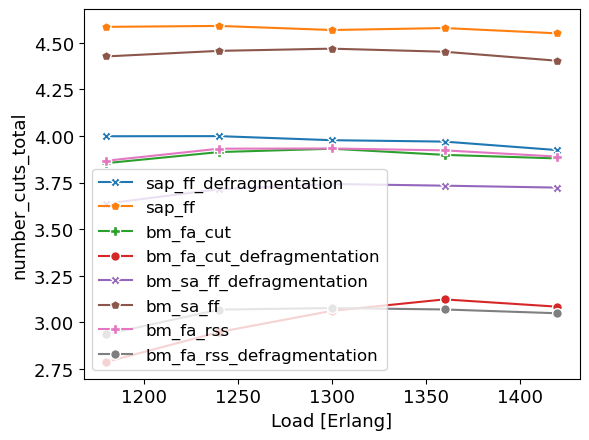

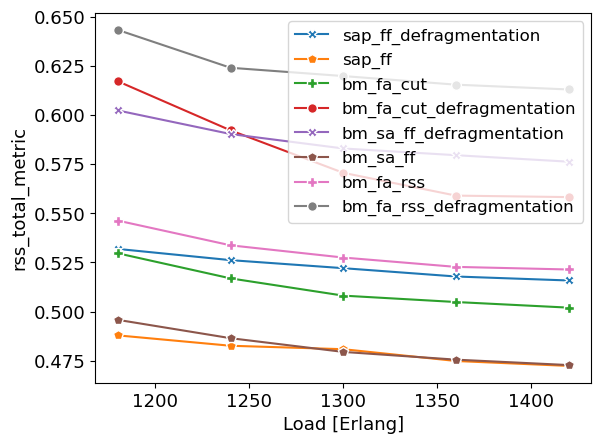

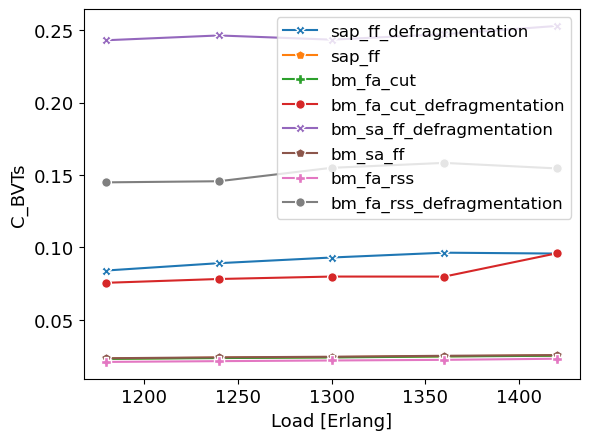

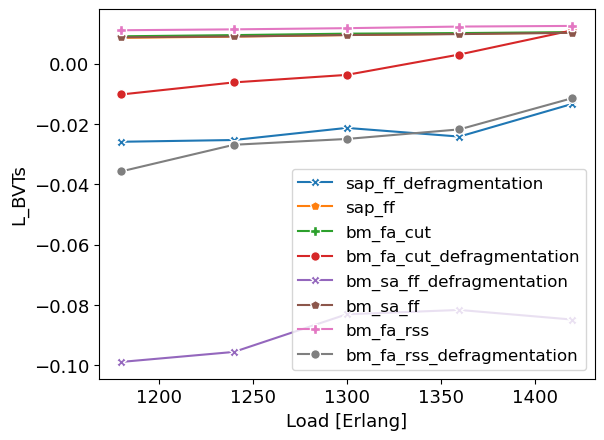

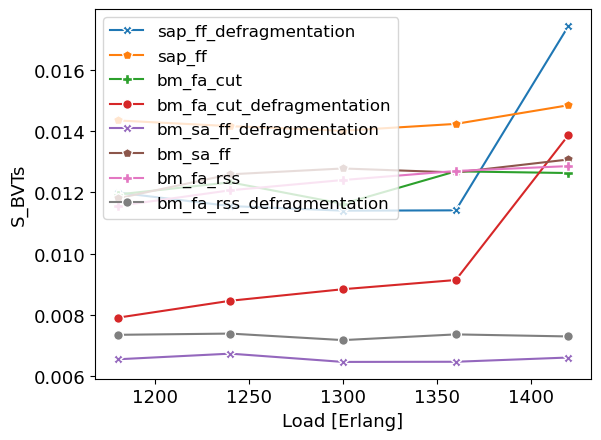

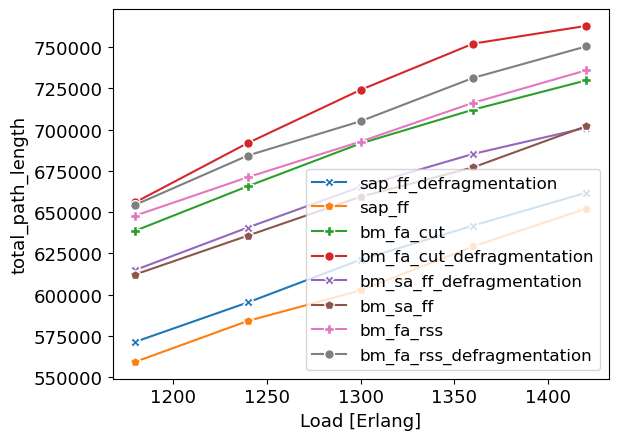

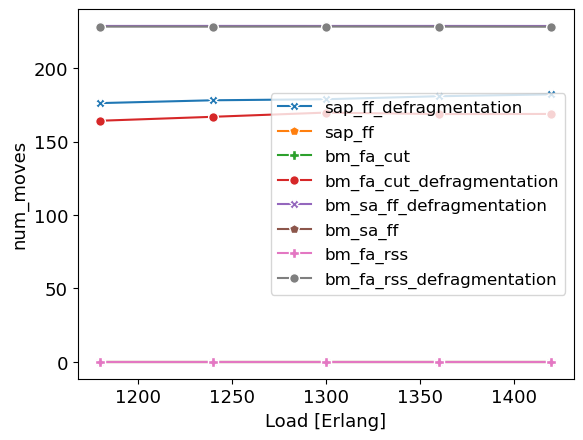

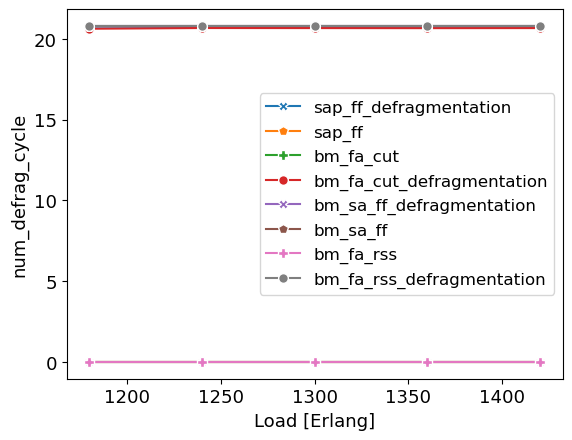

In [15]:
## This is for defragmentation

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1180
max_load = 1430
step_length = 60
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'C_BVTs',
    'L_BVTs',
    'S_BVTs',
    'total_path_length',
    'num_moves',
    'num_defrag_cycle'
]

episode_length = 210
sap_ff_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
sap_ff_df_loads = {metric: [] for metric in metrics}
bm_fa_cut_df_loads = {metric: [] for metric in metrics}
bm_fa_rss_df_loads = {metric: [] for metric in metrics}
bm_sa_ff_df_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut.monitor.csv',
        skiprows=1)

    bm_fa_cut_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-FA-Cut.monitor.csv', skiprows=1)
    
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_fa_rss_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-FA-RSS.monitor.csv', skiprows=1)

    
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    bm_sa_ff_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-SA-FF.monitor.csv',
        skiprows=1)

    
    sap_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
        skiprows=1)
    sap_ff_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/SAP-FF.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic

    
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length', 'num_moves', 'num_defrag_cycle']:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        sap_ff_loads[info].append(np.mean(sap_ff[info]))
        bm_fa_cut_df_loads[info].append(np.mean(bm_fa_cut_df[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_df_loads[info].append(np.mean(bm_fa_rss_df[info]))
        bm_sa_ff_df_loads[info].append(np.mean(bm_sa_ff_df[info]))
        sap_ff_df_loads[info].append(np.mean(sap_ff_df[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length', 'num_moves', 'num_defrag_cycle']:
    plt.figure()
    if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        print(f"{np.mean(bm_sa_ff_loads[info])}")
        print(np.mean(bm_fa_cut_loads[info]))
        print(np.mean(bm_fa_rss_loads[info]))
        print(np.mean(sap_ff_loads[info]))
        print(f"{np.mean(bm_sa_ff_df_loads[info])}")
        print(np.mean(bm_fa_cut_df_loads[info]))
        print(np.mean(bm_fa_rss_df_loads[info]))
        print(np.mean(sap_ff_df_loads[info]))
        ax_bm_sap_df = plt.semilogy(loads, sap_ff_df_loads[info], label='sap_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_cut = plt.semilogy(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_cut_df = plt.semilogy(loads, bm_fa_cut_df_loads[info], label='bm_fa_cut_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')


        
        ax_bm_sa_ff_df = plt.semilogy(loads, bm_sa_ff_df_loads[info], label='bm_sa_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_bm_sa_ff = plt.semilogy(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_rss = plt.semilogy(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss_df = plt.semilogy(loads, bm_fa_rss_df_loads[info], label='bm_fa_rss_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')

    else:
        ax_bm_sap_df = plt.plot(loads, sap_ff_df_loads[info], label='sap_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_cut = plt.plot(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_cut_df = plt.plot(loads, bm_fa_cut_df_loads[info], label='bm_fa_cut_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')


        
        ax_bm_sa_ff_df = plt.plot(loads, bm_sa_ff_df_loads[info], label='bm_sa_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_bm_sa_ff = plt.plot(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_rss = plt.plot(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss_df = plt.plot(loads, bm_fa_rss_df_loads[info], label='bm_fa_rss_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Load [Erlang]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)

    plt.legend(loc='upper right')
    plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')



